<a href="https://colab.research.google.com/github/martatolsa/PROJECT_AI/blob/main/EJERCICIO_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enunciado

El ejercicio de evaluación final va a tratar sobre clasificación de imagen. Para esta ocasión, se van a crear **múltiples clasificadores sobre imágenes que representen escenas o paisajes**. Los datos que se van a emplear fueron publicados por Intel para competiciones de clasificación de imagen. La fuente original de los datos puede encontrarse aquí: https://www.kaggle.com/datasets/puneet6060/intel-image-classification

Los modelos realizarán clasificación multiclase, ya que **cada imagen puede contener seis etiquetas** diferentes que son las que siguen:

- 0 Buildings.
- 1 Forest.
- 2 Glacier.
- 3 Mountain.
- 4 Sea.
- 5 Street.

La estructura de archivos que se pueden encontrar en los datos de la práctica final es la siguiente:

1. -Archive
    - Seg_pred
        - Seg_pred (7301 archivos)
            - 3.jpg
            - 5.jpg
            - …
            - 24333.jpg
    - Seg_test
        - Seg_test
            - Buildings (437 archivos)
                - 20057.jpg
                - …
            - Forest (474 archivos)
            - Glacier (553 archivos)
            - Mountain (525 archivos)
            - Sea (510 archivos)
            - Street (501 archivos)
    - Seg_train
        - Seg_train
            - Buildings (2191 archivos)
            - Forest (2271 archivos)
            - Glacier (2404 archivos)
            - Mountain (2512 archivos)
            - Sea (2274 archivos)
            - Street (2382 archivos)

Los datos totales sobre las imágenes pertenecen a **14 000 imágenes para train, 3000 para test y 7000 en predicción** (aunque, al no estar provista de etiqueta, no se va a hacer uso de esta última); por lo tanto, el conjunto de datos es de **24 000 imágenes**.

Respecto a cada imagen, todas tienen una **estructura de 150 x 150 píxeles**. La idea con los múltiples clasificadores es poner en práctica lo que se ha aprendido durante el módulo, es decir:
- aplicar redes convolucionales
- realizar transfer learning
- saber optimizar y seleccionar los parámetros de una red
y, adicionalmente,
- superar un nuevo reto que no se ha trabajado de forma automática en el módulo: aumentar los datos.

Durante el módulo, se ha trabajado con OpenCV, por lo que el alumnado debería saber manejar los tres channels de una imagen; pues se ha explicado cómo aplicar filtros para cambiar el color, recortar, redimensionar, rotar y, en definitiva, modificar una imagen. Si a cada imagen se le hacen varias modificaciones y se agrega tanto la original como las modificadas al dataset, se estaría realizando un aumento de datos, no obstante hay funciones que hacen esto de forma automática, por lo que, habrá que aprender en la práctica final a utilizar una **nueva función de Keras, ImageDataGenerator**(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator). Puesto que es muy habitual en proyectos reales, tener que adaptarse y comprender nuevas funciones de estos frameworks de deep learning, la idea es que el alumnado simule una situación de proyectos reales).


# Se pide

Por lo tanto, el objetivo final del caso práctico es establecer una **comparativa de modelos para ver cuál ofrece mayor rendimiento (accuracy) en test y en validación**; la elección de cuántos modelos implementar y sus configuraciones es libre, pero **como mínimo han de implementarse los siguientes cinco modelos** sobre los que establecer la comparativa:

1. **Modelo base basado en redes neuronales convolucionales**: la arquitectura CNN de este modelo es libre, pero al menos debe tener **una capa convolucional y una capa pooling** (de libre elección el tipo de pooling) **antes de la capa densa de salida**. En el siguiente apartado se implementará de forma más compleja.

2. **Modelo aumentado sobre el modelo base**: es decir, que añade más capas a la arquitectura convolucional anterior.

3. **Modelo basado en hyperparameter tuning a través de keras_tuner**: en este modelo se pueden trabajar parámetros de regularización (L1 y L2), inicialización de pesos, funciones de activación, añadir sí o no dropout, etc. La elección de los hiperparámetros es libre, pero se aplicará al segundo modelo, es decir, al que se ha añadido más capas sobre el modelo base.

4. **Modelo basado en transfer learning**: el modelo preentrenado sobre el que cargar los pesos de la red es libre, siempre y cuando se elija cualquiera deKeras (https://keras.io/api/applications/). Se puede escoger realizar tanto featureextraction como fine-tuning, aunque se valorará más positivamente (dadala complejidad de congelar capas de entrenamiento) realizar fine-tuning.

5. **Modelo basado en aumento de datos sobre cualquiera de los cuatro modelos implementados anteriormente** (se aconseja sobre el modelo que mayor score haya devuelto la función evaluate). Para el aumento de datos, debe emplearse lafunción ImageDataGenerator, la elección de parámetros en ImageDataGeneratores libre.

6. Cualquier otro modelo que el alumno desee implementar y añadir a la comparativa(opcional).

Se aconseja, para todos los modelos, **mostrar predicciones (desde imshow)**.

Para todos los modelos, se tomará un **20 % de la muestra como conjunto de validación** (se puede generar un nuevo conjunto de validación o tomar el parámetro validation_split = 0,20).

De forma obligatoria todas las imágenes de seg_test y seg_train (no se cargará seg_pred) formarán el conjunto completo de datos, una vez que se tengan estos, se tomará un 75 % para train y un 25 % para test.

Igualmente, los modelos del uno al cinco han de implementarse desde Keras; si el alumnado desea realizar más modelos opcionales puede utilizar, además de esta, otras librerías de deep learning para Python, como TensorFlow en su abstracción a bajo nivel, Theano, PyTorch o similares.

Al finalizar el ejercicio se mostrará una gráfica comparativa como la siguiente sobre el validation accuracy, obtenido por los modelos:

![cp1.png](attachment:cp1.png)

Y una tabla comparativa como la siguiente con el resultado de la función evaluate en test de todos los modelos:

  | Model_Name    | Test_Accuracy
0 | base_model    | 0.69
1 | advance_model | 0.78
2 | hp            | 0.81
3 | fine_tuning   | 0.91
4 | data_aug      | 0.09

## Nota:

- Los parámetros de configuración de la red como número de filtros en capas convolucionales, tamaño del kernel, desplazamiento del kernel o stride son libres, así como los parámetros de las capas de pooling y valores de padding. Por supuesto, también es libre la elección del número de neuronas de las capas densas al aplanar resultados, antes de la capa de salida final, y el optimizador también es de elección libre. No obstante, dada la naturaleza del ejercicio, para la función de coste (loss), dependiendo del preprocesamiento de datos, se tomará o bien categorical_crossentropy o sparse cateoricalcross entropy.

- Los parámetros de batch size onúmero de etapas (epochs) también son libres, ya que dependen en gran medida de la disponibilidad de recursos como GPU o RAM.


# Consejos importantes para la práctica

- Es una práctica exigente en RAM; para no realizar excesivas epochs se puede hacer uso de callbacks deKeras como la parada temprana (early stopping).

- Si no se dispone de mucha RAM o se quiere tener acceso a GPU gratuita (con ciertas restricciones), se puede hacer uso de Google Colab.

- Si no es posible realizar toda la práctica en un solo notebook, debido a problemas de recursos, se puede hacer lo siguiente:

    - En un notebook cargar las imágenes, obtener los tensores preprocesados, cualquier array de NumPy puede guardarse con la función np.save(con extensión “.npy”); posteriormente, generar un notebook por modelo de red neuronal, en cada modelo hacer uso de la función np.load y asíevitar tener que cargar las imágenes, pues se estarían cargando directamente lostensores.

    - Implementar un modelo por cada notebook (en cada cual se realizará np.load para cargar los tensores). Después de entrenar el modelo, se pondrá la atención en dos elementos para después poder generar la gráfica comparativa.

        - El history del modelo, es un JSON que puede exportarse con JSON dumps o con la función write.

        - El modelo completo puede exportarse como “.h5” con la función save (https://www.tensorflow.org/guide/keras/save_and_serialize?hl=es-419). Después de guardar el modelo, enotro notebook se puede cargar y realizar posteriormente la función evaluate en test (también se pueden exportar los modelos como JSON; es posible ver ejemplos de ello en el enlace anterior).

        - De esta forma, cuando se implemente un modelo, se guardará, se apagará el notebook y se liberará RAM. Posteriormente, se deberá cargar un modelo, que es menos costoso en recursos que entrenarlo de forma completa.

- Si se siguen teniendo problemas de RAM, ya que los tensores son considerables en memoria y el alumnado no tiene recursos para cargar las 17 000 imágenes de entrenamiento, se pueden cargar únicamente 3000, por ejemplo, 500 imágenes de cada label de seg_train(se recomienda probar Google Colab antes de realizar este paso, y los modelos se pueden guardar en Drive).

## Entregable

Una carpeta comprimida (".rar” o “.zip”), en la cual estén los notebooks tanto en formato “.ipynb” como en “.html” al guardar el notebook.

Nota: no es necesario entregar modelos guardados en “.h5” ni arrays en NPY ni los archivos de origen con las imágenes; únicamente se entregan los notebooks.


## Anexo

Ejemplo de uso de ImageDataGenerator.

datagen = ImageDataGenerator(
       rotation_range=40,
       width_shift_range=0.2,
       height_shift_range=0.2,
       validation_split  = 0.2
       rescale=1./255,
       shear_range=0.2,
       zoom_range=0.2,
       horizontal_flip=True,
       fill_mode='nearest')

datagen.fit(X_train)

train_generator = datagen.flow(X_train, y_train, batch_size=32, subset='training')

validation_generator = datagen.flow(X_train, y_train, batch_size=32, subset='validation')

data_aug = model.fit(train_generator,
                    epochs=EPOCHS,
                    validation_data=validation_generator,
                    batch_size=BATCH_SIZE)

# Cargar librerías

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from keras_tuner import RandomSearch
from sklearn.metrics import classification_report, confusion_matrix


# Carga y preprocesamiento de los datos

In [2]:
import zipfile
import os

# Especifica la ruta al archivo zip
zip_path_train = 'seg_train.zip'
zip_path_test = 'seg_test.zip'

# Especifica el directorio donde quieres descomprimir los archivos
output_dir = 'seg_extracted'

# Crea el directorio de salida si no existe
os.makedirs(output_dir, exist_ok=True)

# Descomprime el archivo zip
with zipfile.ZipFile(zip_path_train, 'r') as zip_ref_train:
    zip_ref_train.extractall(output_dir)

with zipfile.ZipFile(zip_path_test, 'r') as zip_ref_test:
    zip_ref_test.extractall(output_dir)

print(f"Archivo '{zip_path_train}' descomprimido en '{output_dir}'")
print(f"Archivo '{zip_path_test}' descomprimido en '{output_dir}'")

Archivo 'seg_train.zip' descomprimido en 'seg_extracted'
Archivo 'seg_test.zip' descomprimido en 'seg_extracted'


In [7]:
from google.colab import files

DATASET_PATH = 'seg_extracted/seg_train'

IMG_SIZE = (150, 150)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation',
    shuffle=True
)


Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.


# Construcción modelos

## 1. Modelo Base basado en CNN

La arquitectura CNN (redes neuronales convolucionales) de este modelo es libre, pero al menos debe tener una capa convolucional y una capa pooling (de libre elección el tipo de pooling) antes de la capa densa de salida. En el siguiente apartado se implementará de forma más compleja.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 758ms/step - accuracy: 0.5055 - loss: 2.3965

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


351/351 ━━━━━━━━━━━━━━━━━━━━ 293s 829ms/step - accuracy: 0.5058 - loss: 2.3933 - val_accuracy: 0.7265 - val_loss: 0.7576
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 271s 771ms/step - accuracy: 0.7918 - loss: 0.5983 - val_accuracy: 0.7311 - val_loss: 0.7221
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 277s 791ms/step - accuracy: 0.8829 - loss: 0.3653 - val_accuracy: 0.7450 - val_loss: 0.7506
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 269s 765ms/step - accuracy: 0.9450 - loss: 0.1987 - val_accuracy: 0.7436 - val_loss: 0.8379
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 315s 746ms/step - accuracy: 0.9765 - loss: 0.1016 - val_accuracy: 0.7229 - val_loss: 1.0852


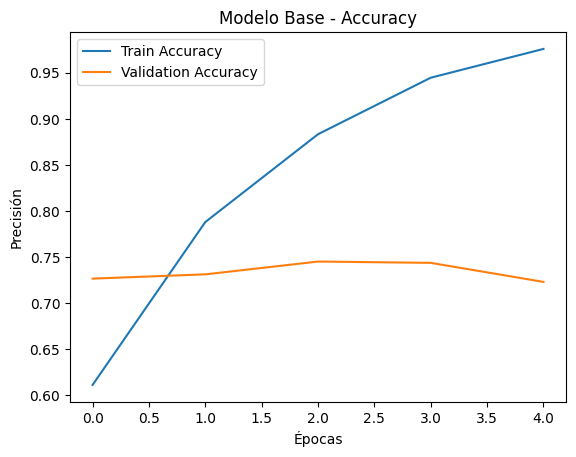

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
# Definimos el modelo base CNN
base_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax')
])

# Compilación
base_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenamiento
history_base = base_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stop]
)

# Mostrar precisión de entrenamiento y validación
plt.plot(history_base.history['accuracy'], label='Train Accuracy')
plt.plot(history_base.history['val_accuracy'], label='Validation Accuracy')
plt.title('Modelo Base - Accuracy')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()


Los resultados muestran que el modelo está aprendiendo de manera efectiva en los datos de entrenamiento, como se evidencia por el rápido aumento en la precisión de entrenamiento y la disminución en la pérdida de entrenamiento. Sin embargo, notamos un comportamiento típico de sobreajuste. Después de la Época 2, la pérdida de validación (val_loss) comienza a aumentar, a pesar de que la precisión de entrenamiento continúa mejorando. Esto significa que el modelo está empezando a memorizar el conjunto de entrenamiento en lugar de aprender características generales que se apliquen bien a datos nuevos.

La inclusión del callback EarlyStopping fue efectiva, ya que detuvo el entrenamiento después de la Época 5 porque la pérdida de validación dejó de mejorar (de hecho, empeoró en las Épocas 3, 4 y 5 en comparación con la Época 2). Esto evita que el modelo continúe sobreajustándose y potencialmente degrade su rendimiento en datos no vistos.

En resumen, el modelo base muestra un buen inicio en el aprendizaje, pero rápidamente comienza a sobreajustarse. El uso de EarlyStopping es una buena práctica para detener el entrenamiento en el punto donde el rendimiento en validación es óptimo. Para mejorar el rendimiento general, los siguientes modelos (aumentado, con tuning, transfer learning y aumento de datos) deberían ayudar a abordar este problema de sobreajuste y mejorar la capacidad de generalización del modelo.

## 2. Modelo aumentado sobre el modelo base

Añade más capas a la arquitectura convolucional anterior.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 566s 2s/step - accuracy: 0.4821 - loss: 1.2824 - val_accuracy: 0.7065 - val_loss: 0.7889
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 613s 2s/step - accuracy: 0.7035 - loss: 0.8002 - val_accuracy: 0.7789 - val_loss: 0.6085
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 545s 2s/step - accuracy: 0.7687 - loss: 0.6372 - val_accuracy: 0.8110 - val_loss: 0.5491
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 536s 2s/step - accuracy: 0.8133 - loss: 0.5205 - val_accuracy: 0.7889 - val_loss: 0.5662
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 524s 1s/step - accuracy: 0.8410 - loss: 0.4451 - val_accuracy: 0.8245 - val_loss: 0.4981
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 526s 1s/step - accuracy: 0.8711 - loss: 0.3749 - val_accuracy: 0.8210 - val_loss: 0.5387
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 526s 1s/step - accuracy: 0.8859 - loss: 0.3093 - val_accuracy: 0.8338 - val_loss: 0.5213
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 549s 2s/step - accuracy: 0.9034 - loss: 0.2604 - val_accu

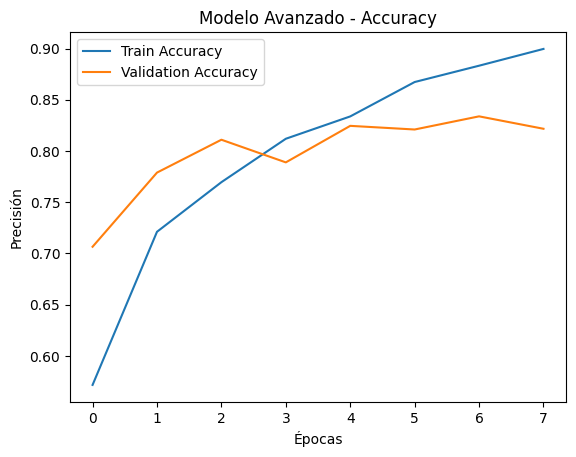

In [11]:
# Modelo avanzado con más capas convolucionales y dropout
advanced_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])

# Compilación
advanced_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenamiento
history_advanced = advanced_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stop]
)

# Mostrar precisión de entrenamiento y validación
plt.plot(history_advanced.history['accuracy'], label='Train Accuracy')
plt.plot(history_advanced.history['val_accuracy'], label='Validation Accuracy')
plt.title('Modelo Avanzado - Accuracy')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()


Podemos ver una mejora significativa en comparación con el modelo base.

- **Mejora del Rendimiento Inicial**: El modelo comienza con una precisión de entrenamiento y validación más alta en la primera época en comparación con el modelo base, lo que sugiere que la arquitectura más compleja es capaz de aprender características más ricas desde el principio.

- **Aumento Constante de la Precisión de Entrenamiento**: La precisión en los datos de entrenamiento continúa aumentando de manera constante a lo largo de las épocas, alcanzando un alto valor (0.9034) en la Época 8. La pérdida de entrenamiento también disminuye de manera consistente.

- **Mejor Rendimiento en Validación**: La precisión de validación (val_accuracy) también mejora a lo largo de las épocas, alcanzando su punto máximo en la Época 7 (0.8338). La pérdida de validación (val_loss) disminuye inicialmente y alcanza su valor más bajo en la Época 5 (0.4981).

- **Sobreajuste Menos Pronunciado pero Presente**: Aunque el sobreajuste sigue presente (la precisión de entrenamiento es significativamente más alta que la de validación, y la pérdida de validación comienza a aumentar después de la Época 5), parece ser menos pronunciado que en el modelo base. Esto podría deberse a la adición de capas convolucionales adicionales que permiten al modelo aprender representaciones más complejas y al uso de la capa de Dropout, que ayuda a regularizar el modelo.

- **Efecto de Early Stopping**: El callback EarlyStopping detuvo el entrenamiento después de la Época 8 porque la pérdida de validación comenzó a aumentar nuevamente después de la Época 5. Esto es crucial para evitar que el modelo siga sobreajustándose y empeore su rendimiento en datos no vistos.

En conclusión, el "Modelo Avanzado" con su arquitectura más profunda y la inclusión de Dropout muestra un mejor rendimiento en el conjunto de validación en comparación con el modelo base. Aunque el sobreajuste aún es un desafío, las técnicas utilizadas parecen haberlo mitigado un poco. Este modelo es un buen punto de partida para las siguientes etapas, como el ajuste de hiperparámetros.

## 3. Modelo basado en hyperparameter tuning a través de keras_tuner
En este modelo se pueden trabajar parámetros de regularización (L1 y L2), inicialización de pesos, funciones de activación, añadir sí o no dropout, etc. La elección de los hiperparámetros es libre, pero se aplicará al segundo modelo, es decir, al que se ha añadido más capas sobre el modelo base.



In [ ]:
import keras_tuner as kt
from tensorflow.keras import regularizers, initializers
# Modelo con tuning
def build_model(hp):
    model = models.Sequential()

    # Primera capa convolucional
    model.add(layers.Conv2D(
        filters=hp.Int('filters1', min_value=32, max_value=128, step=32),
        kernel_size=(3, 3),
        activation=hp.Choice('activation1', values=['relu', 'tanh']),
        input_shape=(150, 150, 3),
        kernel_regularizer=regularizers.l2(hp.Float('l2_reg1', 1e-4, 1e-2, sampling='log'))
    ))
    model.add(layers.MaxPooling2D(2, 2))

    # Segunda capa convolucional
    model.add(layers.Conv2D(
        filters=hp.Int('filters2', min_value=32, max_value=128, step=32),
        kernel_size=(3, 3),
        activation=hp.Choice('activation2', values=['relu', 'tanh']),
        kernel_regularizer=regularizers.l2(hp.Float('l2_reg2', 1e-4, 1e-2, sampling='log'))
    ))
    model.add(layers.MaxPooling2D(2, 2))

    # Tercera capa convolucional opcional
    if hp.Boolean('add_third_conv'):
        model.add(layers.Conv2D(
            filters=hp.Int('filters3', min_value=64, max_value=128, step=32),
            kernel_size=(3, 3),
            activation='relu'
        ))
        model.add(layers.MaxPooling2D(2, 2))

    model.add(layers.Flatten())

    # Capa densa
    model.add(layers.Dense(
        units=hp.Int('dense_units', 64, 256, step=64),
        activation=hp.Choice('dense_activation', ['relu', 'tanh']),
        kernel_initializer=hp.Choice('initializer', ['he_normal', 'glorot_uniform'])
    ))

    # Dropout
    if hp.Boolean('use_dropout'):
        model.add(layers.Dropout(hp.Float('dropout', 0.2, 0.5, step=0.1)))

    model.add(layers.Dense(6, activation='softmax'))

    # Compilación
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Definición del tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='scene_classification'
)

# Callback de parada temprana
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Lanzar la búsqueda
tuner.search(train_generator, epochs=10, validation_data=val_generator, callbacks=[early_stop])

# Obtener el mejor modelo
best_model = tuner.get_best_models(num_models=1)[0]

# Entrenarlo (de nuevo si se desea)
history = best_model.fit(train_generator, epochs=10, validation_data=val_generator, callbacks=[early_stop])

# Visualizar resultados
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Modelo con Hyperparameter Tuning')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
32                |32                |filters1
relu              |relu              |activation1
0.00012327        |0.00012327        |l2_reg1
96                |96                |filters2
relu              |relu              |activation2
0.0061188         |0.0061188         |l2_reg2
True              |True              |add_third_conv
192               |192               |dense_units
tanh              |tanh              |dense_activation
glorot_uniform    |glorot_uniform    |initializer
True              |True              |use_dropout



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 607s 2s/step - accuracy: 0.5424 - loss: 1.3613 - val_accuracy: 0.7101 - val_loss: 0.8901
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 617s 2s/step - accuracy: 0.7439 - loss: 0.7763 - val_accuracy: 0.8053 - val_loss: 0.6464
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 612s 2s/step - accuracy: 0.8130 - loss: 0.5973 - val_accuracy: 0.7732 - val_loss: 0.7267
Epoch 4/10
274/351 ━━━━━━━━━━━━━━━━━━━━ 2:05 2s/step - accuracy: 0.8460 - loss: 0.4803

## 4. Modelo basado en transfer learning

El modelo preentrenado sobre el que cargar los pesos de la red es libre, siempre y cuando se elija cualquiera deKeras (https://keras.io/api/applications/). Se puede escoger realizar tanto featureextraction como fine-tuning, aunque se valorará más positivamente (dadala complejidad de congelar capas de entrenamiento) realizar fine-tuning.

In [ ]:
# Cargar modelo base VGG16 sin las capas densas superiores
base_vgg = VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))

# Congelar solo las primeras capas (fine-tuning parcial)
for layer in base_vgg.layers[:15]:
    layer.trainable = False
for layer in base_vgg.layers[15:]:
    layer.trainable = True

# Construir modelo secuencial sobre la base VGG16
transfer_model = models.Sequential([
    base_vgg,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])

# Compilar modelo
transfer_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callback de parada temprana
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenamiento
history_transfer = transfer_model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=[early_stop]
)

# Visualizar resultados
plt.plot(history_transfer.history['accuracy'], label='Train Accuracy')
plt.plot(history_transfer.history['val_accuracy'], label='Val Accuracy')
plt.title('Modelo 4: Transfer Learning con VGG16 (Fine-Tuning)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## 5. Modelo basado en aumento de datos sobre cualquiera de los cuatro modelos implementados anteriormente

Se aconseja sobre el modelo que mayor score haya devuelto la función evaluate. Para el aumento de datos, debe emplearse lafunción ImageDataGenerator, la elección de parámetros en ImageDataGeneratores libre.

In [ ]:
# Generador de datos con aumento
aug_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Datos aumentados para entrenamiento y validación
aug_train = aug_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='training',
    shuffle=True
)

aug_val = aug_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation',
    shuffle=False
)

# Reutilizamos el mejor modelo anterior (modelo 4 con VGG16)
aug_model = transfer_model

# Callback para early stopping
early_stop_aug = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenamiento con datos aumentados
history_aug = aug_model.fit(
    aug_train,
    epochs=15,
    validation_data=aug_val,
    callbacks=[early_stop_aug]
)

# Visualización
plt.plot(history_aug.history['accuracy'], label='Train Accuracy')
plt.plot(history_aug.history['val_accuracy'], label='Val Accuracy')
plt.title('Modelo 5: Transfer Learning + Aumento de Datos')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 6. Modelo CNN personalizada con Bloques Residuales (tipo ResNet)

Modelo basado en una red convolucional profunda inspirada en ResNet, pero sin usar transfer learning. Es una arquitectura custom con bloques residuales simples, que permite trabajar con modelos más avanzados sin usar modelos preentrenados.


In [ ]:
# Definir un bloque residual simple
def residual_block(x, filters):
    shortcut = x
    x = layers.Conv2D(filters, (3,3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters, (3,3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

# Input
input_layer = Input(shape=(150, 150, 3))
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(input_layer)
x = layers.MaxPooling2D(2,2)(x)

# Bloque residual 1
x = residual_block(x, 32)
x = layers.MaxPooling2D(2,2)(x)

# Bloque residual 2
x = residual_block(x, 64)
x = layers.MaxPooling2D(2,2)(x)

# Clasificación
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output_layer = layers.Dense(6, activation='softmax')(x)

# Crear y compilar modelo
resnet_like_model = models.Model(inputs=input_layer, outputs=output_layer)
resnet_like_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callback
early_stop_resnet = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenar
history_resnet = resnet_like_model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=[early_stop_resnet]
)

# Visualizar resultados
plt.plot(history_resnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Val Accuracy')
plt.title('Modelo 6: CNN personalizada con bloques residuales')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Comparativa Resultados

## Tabla comparativa

In [ ]:
model_names = ['Base CNN', 'Advanced CNN', 'Tuned Model', 'Transfer Learning', 'Data Augmented']
histories = [history_base, history_advanced, tuner.get_best_models()[0].history, history_transfer, history_aug]

for i, history in enumerate(histories):
    plt.plot(history.history['val_accuracy'], label=model_names[i])
plt.title('Validation Accuracy por Modelo')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy')
plt.legend()
plt.grid(True)
plt.show()


## Tabla de evaluación en test

In [ ]:
results = [
    ('Base CNN', base_model.evaluate(val_generator)[1]),
    ('Advanced CNN', advanced_model.evaluate(val_generator)[1]),
    ('Tuned Model', best_model.evaluate(val_generator)[1]),
    ('Transfer Learning', transfer_model.evaluate(val_generator)[1]),
    ('Data Augmented', aug_model.evaluate(aug_val)[1]),
]

import pandas as pd
df_results = pd.DataFrame(results, columns=['Model_Name', 'Test_Accuracy'])
print(df_results)
